In [1]:
from active_optics_woCEO_init import *

>>> ON_AXIS_SRC.json
>>> ATMOSPHERE.json
>>> WFS_GUIDE_STARS.json
>>> WFS.json
>>> ON_AXIS_IMGR.json
>>> TT7_GUIDE_STAR.json
>>> TT7.json
>>> GMT.json


In [2]:
from GMTLIB import CalibrationVault

In [3]:
from LinearActiveOptics import LinearActiveOptics

# W/ TT7

In [4]:
#%%time
#%capture AcO_log
includeBM=True
lsq_aco = LinearActiveOptics(gmt_prms,tt7_guide_star,wfs_guide_stars,wfs_prms,
                  includeBM=includeBM,filename='ActiveOpticsWM1S7Tz_wOs_wBM')

@(AcO.LSQ)> TT7 calibration of observables ...
@(AcO.LSQ)> Interaction matrices loaded from ActiveOpticsWM1S7Tz_wOs_wBM
(7460, 376)
@(CalibrationMatrix)> Updating the pseudo-inverse...
[2, 2, 2, 2, 2, 2, 0]
(376, 376)
@(AcO.LSQ)> Setting initial aberrations ...
 >> Initial WFE RMS: 440.02micron
 >> Initial WFE RMS after TT7 correction: 440.02micron


In [ ]:
lsq+

In [5]:
lsq_aco.Os[0].shape

(5636, 54)

In [6]:
lsq_aco.Os[-1] = np.delete(lsq_aco.Os[-1],[2,8],axis=1)

In [7]:
seeingArcsec = 0.75
pixel_scale_arcsec = lsq_aco.photometry[wfs_guide_stars['photometric_band']]['wavelength']*\
    wfs_prms['BIN_IMAGE']/wfs_prms['d']*180*3600/np.pi/wfs_prms['DFT_osf']

# Modes geometric correlation

In [8]:
#Osn = [X/np.sqrt(np.sum(X**2,axis=0)[None,:]) for X in lsq_aco.Os]
Osn = [X for X in lsq_aco.Os]

CG =[np.dot(X.T,X) for X in Osn]

In [9]:
Osn = [X/np.sqrt(np.sum(X**2,axis=0)[None,:]) for X in 
       [np.concatenate([np.ones((X.shape[0],1)),X],axis=1) for X in lsq_aco.Os]]
Osn = [X for X in 
       [np.concatenate([np.ones((X.shape[0],1)),X],axis=1) for X in lsq_aco.Os]]
CG =[np.dot(X.T,X) for X in Osn]

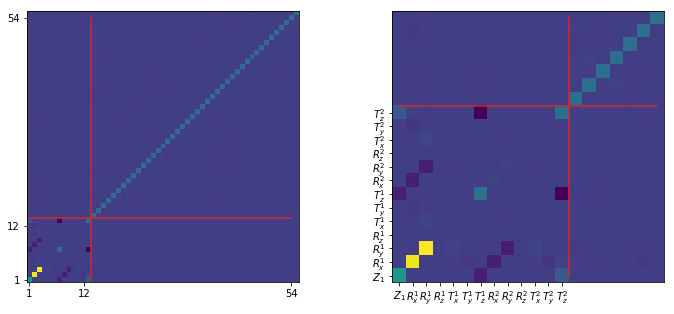

In [10]:
segId = 0
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
ax1.imshow(CG[segId],interpolation='none',origin='lower')
ax1.plot([0,53],[12.5,12.5],'C3')
ax1.plot([12.5,12.5],[0,53],'C3')
ax1.set_xticks([0,11,53])
ax1.set_xticklabels([1,12,54])
ax1.set_yticks([0,11,53])
ax1.set_yticklabels([1,12,54])
h2 = ax2.imshow(CG[segId][:20,:20],interpolation='none',origin='lower')
ax2.plot([0,19],[12.5,12.5],'C3')
ax2.plot([12.5,12.5],[0,19],'C3')
ax2.set_xticks(range(13));
ax2.set_xticklabels([r'$Z_1$',r'$R_x^1$',r'$R_y^1$',r'$R_z^1$',r'$T_x^1$',r'$T_y^1$',r'$T_z^1$',\
                     r'$R_x^2$',r'$R_y^2$',r'$R_z^2$',r'$T_x^2$',r'$T_y^2$',r'$T_z^2$']);
ax2.set_yticks(range(13));
ax2.set_yticklabels([r'$Z_1$',r'$R_x^1$',r'$R_y^1$',r'$R_z^1$',r'$T_x^1$',r'$T_y^1$',r'$T_z^1$',\
                     r'$R_x^2$',r'$R_y^2$',r'$R_z^2$',r'$T_x^2$',r'$T_y^2$',r'$T_z^2$']);

In [11]:
LA.cond(CG[0][:12,:12])

1.0001105880229302e+18

In [12]:
LA.cond(CG[0][12:,12:])

1.4886043564040412

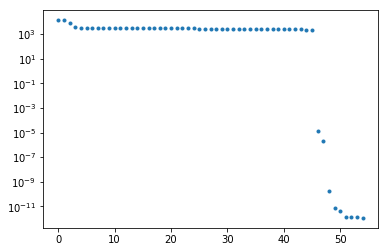

In [13]:
U,s,VT = LA.svd(CG[0])
plt.semilogy(s,'.')

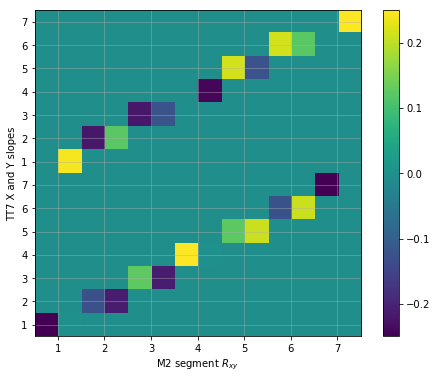

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(8,6)
h = ax.imshow(lsq_aco.Dtt7,origin='lower')
ax.set_xlabel('M2 segment $R_{xy}$')
ax.set_ylabel('TT7 X and Y slopes')
ax.set_xticks(np.arange(1,15,2)-0.5)
ax.set_xticklabels([str(x) for x in range(1,8)]);
ax.set_yticks(range(14))
ax.set_yticklabels([str(x) for x in range(1,8)]+[str(x) for x in range(1,8)]);
plt.colorbar(h,ax=ax)
ax.grid(alpha=0.5)

In [15]:
print lsq_aco.Dtt7.shape
print [x.shape for x in lsq_aco.D_s]

(14, 14)
[(14, 54), (14, 54), (14, 54), (14, 54), (14, 54), (14, 54), (14, 54)]


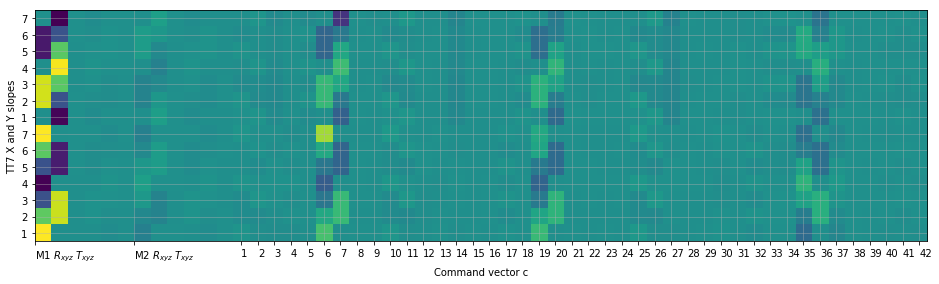

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(16,8)
ax.imshow(np.sum(np.dstack(lsq_aco.D_s),axis=2),origin='lower')
ax.set_xlabel('Command vector c')
ax.set_ylabel('TT7 X and Y slopes')
ax.set_xticks([-0.5,5.5]+range(12,54,1));
ax.set_xticklabels(['M1 $R_{xyz}$ $T_{xyz}$','M2 $R_{xyz}$ $T_{xyz}$']+[str(x) for x in range(1,43)],
                  ha='left');
ax.set_yticks(range(14))
ax.set_yticklabels([str(x) for x in range(1,8)]+[str(x) for x in range(1,8)]);
ax.grid(alpha=0.5)

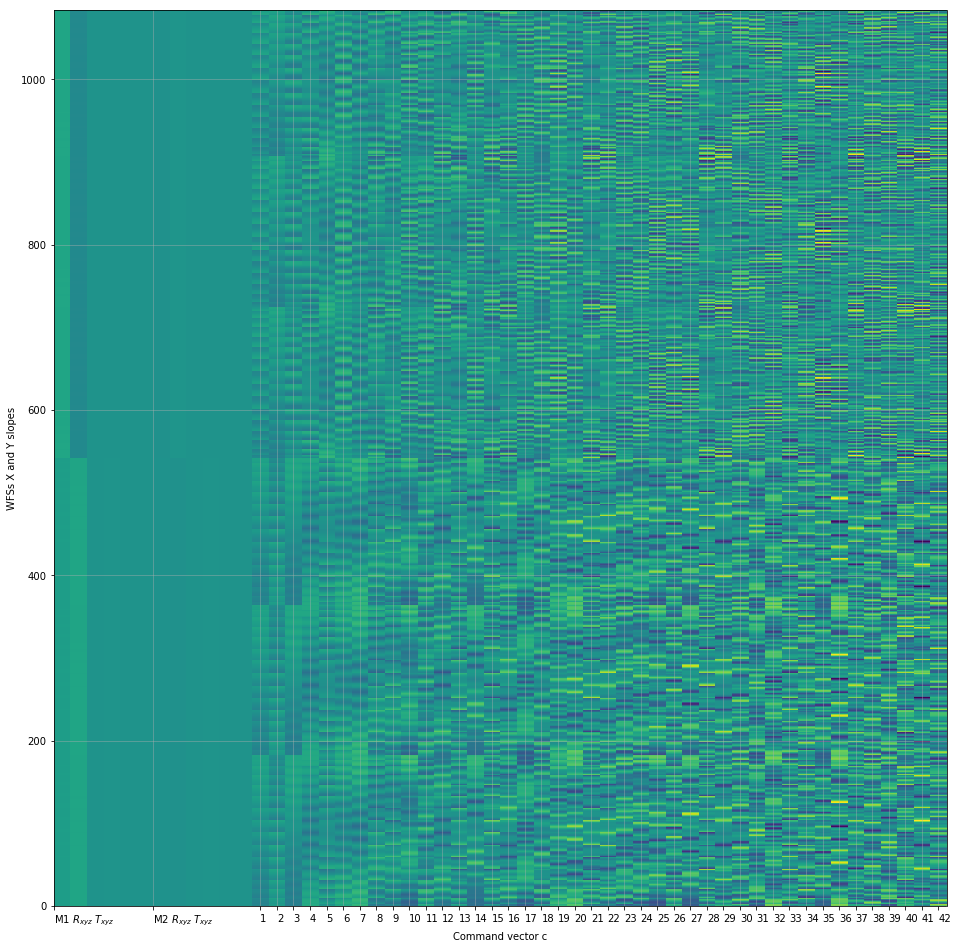

In [25]:
fig,ax = plt.subplots()
fig.set_size_inches(16,20)
ax.imshow(lsq_aco.C.D[1],origin='lower',aspect=0.05)
ax.set_xlabel('Command vector c')
ax.set_ylabel('WFSs X and Y slopes')
ax.set_xticks([-0.5,5.5]+range(12,54,1));
ax.set_xticklabels(['M1 $R_{xyz}$ $T_{xyz}$','M2 $R_{xyz}$ $T_{xyz}$']+[str(x) for x in range(1,43)],
                  ha='left');
#ax.set_yticks(range(14))
#ax.set_yticklabels([str(x) for x in range(1,8)]+[str(x) for x in range(1,8)]);
ax.grid(alpha=0.5)

[[-0.24912071  0.        ]
 [ 0.          0.24311708]]
(2, 2) (2, 54)


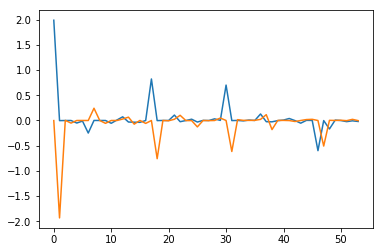

In [18]:
A = np.diag([lsq_aco.Dtt7[0,0],lsq_aco.Dtt7[7,1]])
print A
B = np.vstack([lsq_aco.D_s[0][0,:],lsq_aco.D_s[0][7,:]])
plt.plot(B.T)
print A.shape, B.shape

In [19]:
P2 = np.zeros((12+lsq_aco.N_MODE,2))
P2[6,0] = 1
P2[7,1] = 1
Mtt7 = LA.pinv(A)
C = Mtt7.dot(B)
C.shape

(2, 54)

In [20]:
A.shape

(2, 2)

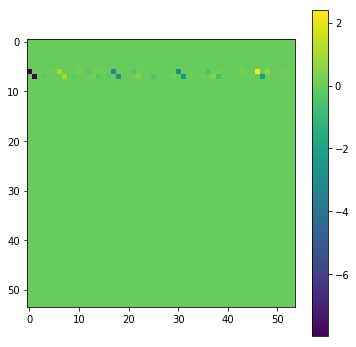

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
h = ax.imshow(P2.dot(C))
plt.colorbar(h,ax=ax)

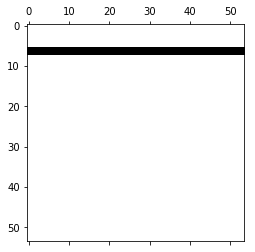

In [22]:
plt.spy(P2.dot(C))

# SINGLE CASE

In [26]:
lsq_aco.threshold = 1e-7

@(CalibrationMatrix)> Updating the pseudo-inverse...
[2, 2, 2, 2, 2, 2, 0]


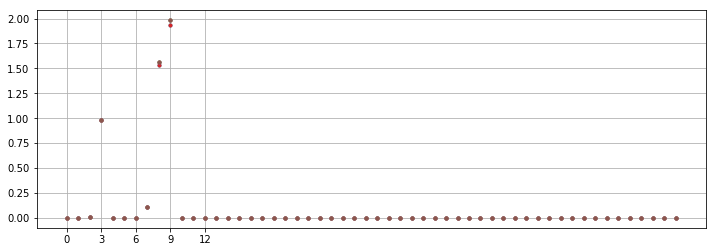

In [27]:
X = lsq_aco._s_Q.dot(lsq_aco._s_Q.T)
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
q = np.split(X.diagonal(),range(54,7*54,54))
u = range(54)
for k in range(6):
    ax.plot(u,q[k],'.')
#u = np.delete(u,[2,8])
#ax.plot(u,q[6],'.')
ax.grid()
ax.set_xticks([0,3,6,9,12]);

In [28]:
W = np.hstack(lsq_aco.Os)
C = W.dot(X.dot(W.T))
np.sqrt(np.trace(C)/W.shape[0])*1e9*1e-6

0.0067210678322875885

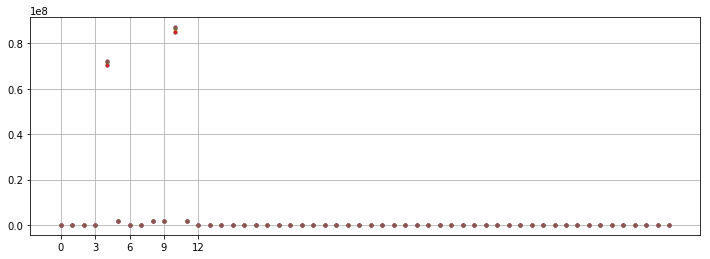

In [29]:
X = lsq_aco._s_Swfs.dot(lsq_aco._s_Swfs.T)
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
q = np.split(X.diagonal(),range(54,7*54,54))
u = range(54)
for k in range(6):
    ax.plot(u,q[k],'.')
#u = np.delete(u,[2,8])
#ax.plot(u,q[6],'.')
ax.grid()
ax.set_xticks([0,3,6,9,12]);

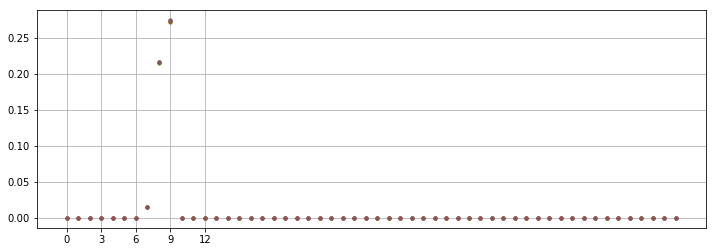

In [30]:
X = lsq_aco._s_Stt7.dot(lsq_aco._s_Stt7.T)
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
q = np.split(X.diagonal(),range(54,7*54,54))
u = range(54)
for k in range(6):
    ax.plot(u,q[k],'.')
#u = np.delete(u,[2,8])
#ax.plot(u,q[6],'.')
ax.grid()
ax.set_xticks([0,3,6,9,12]);

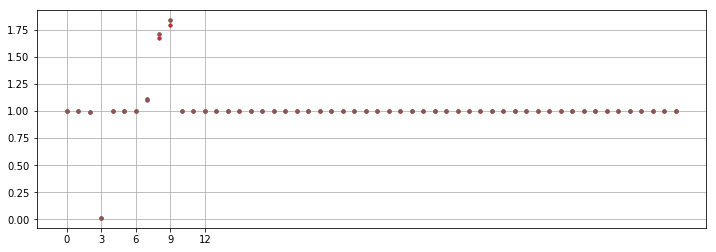

In [31]:
X = lsq_aco._s_S.dot(lsq_aco._s_S.T)
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
q = np.split(X.diagonal(),range(54,7*54,54))
u = range(54)
for k in range(6):
    ax.plot(u,q[k],'.')
#u = np.delete(u,[2,8])
#ax.plot(u,q[6],'.')
ax.grid()
ax.set_xticks([0,3,6,9,12]);

(1e-08, 2)

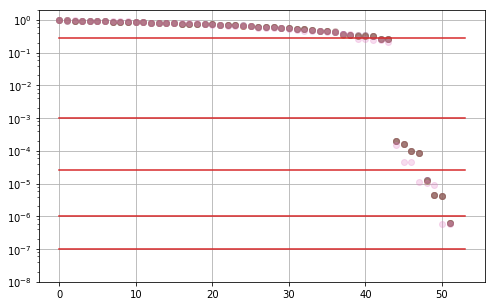

In [32]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
[ax.semilogy(x/x[0],'o',alpha=0.25) for x in lsq_aco.C.eigenValues];
ax.plot([0,53],np.ones(2)*1e-7,'C3')
ax.plot([0,53],np.ones(2)*1e-6,'C3')
ax.plot([0,53],np.ones(2)*10**-4.6,'C3')
ax.plot([0,53],np.ones(2)*1e-3,'C3')
ax.plot([0,53],np.ones(2)*10**-0.55,'C3')
ax.grid()
ax.set_ylim([1e-8,2])

In [33]:
np.log10(3e-1)

-0.52287874528033762

In [34]:
from scipy import sparse
lsq_aco._s_L = 1e-6*sparse.eye(376)
threshold = [-20,-9,-6,-4.3,-3, -0.55]
fitting_wfe_rms = []
wfs_noise_wfe_rms = []
for t in threshold:
    lsq_aco.sparse_WFE(10**t,gs_wfs_mag=10,
            spotFWHM_arcsec=seeingArcsec,
            pixelScale_arcsec=pixel_scale_arcsec,
            nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
    fitting_wfe_rms += [lsq_aco.fitting_wfe_rms]
    wfs_noise_wfe_rms += [lsq_aco.noise_wfs_wfe_rms]

@(CalibrationMatrix)> Updating the pseudo-inverse...
[0, 0, 0, 0, 0, 0, 0]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
[2, 2, 2, 2, 2, 2, 0]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
[3, 3, 3, 3, 3, 3, 2]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
[6, 6, 6, 6, 6, 6, 7]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
[10, 10, 10, 10, 10, 10, 8]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
[12, 12, 12, 12, 12, 12, 13]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972


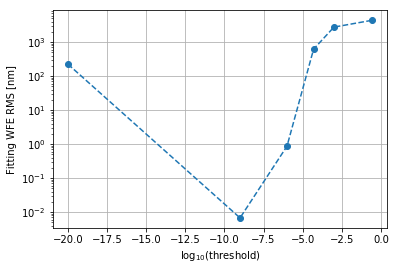

In [35]:

plt.semilogy(threshold,[x*1e6*1e-9 for x in fitting_wfe_rms],'o--')
plt.grid()
plt.xlabel('log$_{10}$(threshold)')
plt.ylabel('Fitting WFE RMS [nm]')

In [36]:
wfs_noise_wfe_rms

[72224206.401324749,
 174.03213201865702,
 173.96206247578169,
 62.063404075533015,
 0.10514833300540986,
 0.093783707766555924]

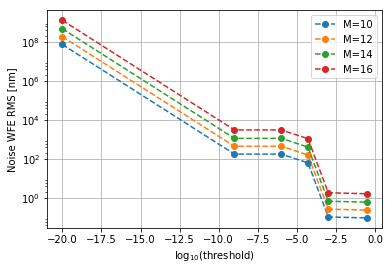

In [44]:
%%capture --no-display
threshold = [-20,-9,-6,-4.3,-3, -0.55]
for mag in [10,12,14,16]:
    fitting_wfe_rms = []
    wfs_noise_wfe_rms = []
    for t in threshold:
        lsq_aco.sparse_WFE(10**t,gs_wfs_mag=mag,
                spotFWHM_arcsec=seeingArcsec,
                pixelScale_arcsec=pixel_scale_arcsec,
                nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
        fitting_wfe_rms += [lsq_aco.fitting_wfe_rms]
        wfs_noise_wfe_rms += [lsq_aco.noise_wfs_wfe_rms]

    plt.semilogy(threshold,wfs_noise_wfe_rms,'o--',label='M=%d'%mag)
    
plt.grid()
plt.xlabel('log$_{10}$(threshold)')
plt.ylabel('Noise WFE RMS [nm]')
plt.legend()

In [ ]:
lsq_aco.pu

In [56]:
X = np.zeros((101**2,1))

In [57]:
W = np.hstack(lsq_aco.Os)
W.shape

(5636, 376)

In [58]:
mask = np.sum(W,axis=1)>0
mask.shape

(5636,)

In [60]:
c = np.random.randn(376,1)*1e-7
Y = W.dot(lsq_aco._s_Q.dot(c)).shape

In [63]:
X[mask,0].shape

/home/rconan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10201 but corresponding boolean dimension is 5636
  if __name__ == '__main__':


(2807,)

In [45]:
lsq_aco._s_L = 1e-7*sparse.eye(376)
lsq_aco.sparse_WFE(10**-9,gs_wfs_mag=10,
            spotFWHM_arcsec=seeingArcsec,
            pixelScale_arcsec=pixel_scale_arcsec,
            nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
print lsq_aco.fitting_wfe_rms, lsq_aco.noise_wfs_wfe_rms

@(CalibrationMatrix)> Updating the pseudo-inverse...
[2, 2, 2, 2, 2, 2, 0]
@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
2.12538823063 174.032132019


In [ ]:
type(lsq_aco._s_Q)

In [31]:
lsq_aco.C.nThreshold

[2, 2, 2, 2, 2, 2, 0]

In [55]:
lsq_aco.new_WFE(10**-,gs_wfs_mag=16,
            spotFWHM_arcsec=seeingArcsec,
            pixelScale_arcsec=pixel_scale_arcsec,
            nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
print lsq_aco.noise_free_wfe, lsq_aco.wfe_rms, lsq_aco.wfe_noise_rms

@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0



ValueError: shapes (54,54) and (52,5636) not aligned: 54 (dim 1) != 52 (dim 0)

In [ ]:
lsq_aco._s_Q.shape

In [ ]:
Y = np.delete(lsq_aco.L[-1],[2,8],axis=0)

In [13]:
 np.delete(Y,[2,8],axis=1).shape

(52, 52)

In [14]:
X = lsq_aco.L[:-1] + [np.delete(np.delete(lsq_aco.L[-1],[2,8],axis=0),[2,8],axis=1)]

In [15]:
len(X)

7

In [11]:
X = lsq_aco.L[:-1] + np.delete(np.delete(lsq_aco.L[-1],[2,8],axis=0),[2,8],axis=1)

ValueError: operands could not be broadcast together with shapes (6,54,54) (52,52) 

In [6]:
lsq_aco.L[-1].shape

(54, 54)

In [28]:
Q = [np.dot(X,Y) for X,Y in zip(self.C.M,self.C.D)]
D = np.insert(self.C.D[-1],[2,7],0,axis=1)
M = np.insert(self.C.M[-1],[2,7],0,axis=0)
Q[-1] = np.dot(M[-1],D)
n_Qb = 12+self.N_MODE
Qb = [np.dot(np.eye(Q[k].shape[0]) - Q[k],self.Qbtt7[k]) for k in range(7)]

In [26]:
M.shape

(54, 940)

In [27]:
k=6
np.shape(Q[-1])

(52, 54)

In [9]:
self.Qbtt7[-1].shape

(54, 54)

In [11]:
W = lsq_aco.wavefrontSample()

In [13]:
W[0].shape

(5636, 1)

In [14]:
256**2

65536

CPU times: user 8.69 s, sys: 228 ms, total: 8.92 s
Wall time: 2.23 s


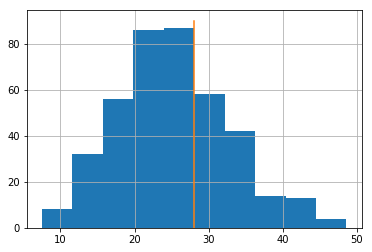

In [16]:
%%time
wfe_rms = np.zeros(400)
for k in range(400):
    W = lsq_aco.wavefrontSample()
    #wfe_rms[k] = np.sqrt(sum([np.var(X) for X in W]))*1e9
    wfe_rms[k] = np.std(np.sum(np.concatenate(W,axis=1),axis=1))*1e9

plt.hist(wfe_rms)
plt.plot([28,28],[0,90])
plt.grid()

In [5]:
W = lsq_aco.wavefrontSample()

In [6]:
W1 = lsq_aco.wavefrontSample1()

In [8]:
np.std(np.sum(np.concatenate(W,axis=1),axis=1))*1e9

527.84493270605174

In [9]:
[np.mean(X[X!=0])*1e9 for X in W]

[162.09905143634811,
 -528.73913768021725,
 556.06182319573077,
 -764.56494672172767,
 767.47914113770639,
 443.89318569596537,
 113.60234416163178]

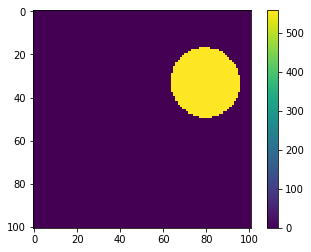

In [10]:
WW = np.zeros(lsq_aco.pupil_mask.shape)
WW[lsq_aco.pupil_mask] = W[2].ravel()

plt.imshow(WW.reshape(101,101)*1e9)
plt.colorbar()

In [11]:
W[6].shape

(5636, 1)

In [64]:
lsq_aco.pupil_mask.shape

(1, 10201)

In [68]:
lsq_aco.Osp[0].shape

(5636, 54)

In [74]:
m = lsq_aco.pupil_mask
m.shape

(1, 10201)

X = lsq_aco.Osp[0]
idx = X!=0
idx.shape
X[idx].shape

In [76]:
for X in lsq_aco.Os:
    for k in range(54):
        Y = X[:,k]
        print np.mean(Y[Y!=0])

0.0767314963065
-3.64797427907e-05
-1.81117066488e-09
-5.18886780883e-08
-0.00458901304397
-1.93312904469
-0.00536869195736
4.54211394419e-06
8.19781825269e-11
2.0553601966e-08
-0.00362336418107
1.94234228149
-1.03307881707e-07
0.000214968740073
0.000119519281645
-3.11499797654e-06
-3.00132661524e-05
-8.10493782332e-05
-2.82917271426e-05
1.92189056034e-07
6.78203649883e-05
2.16045249924e-07
0.000180887965145
2.48186333736e-05
3.4121889034e-06
0.000250977891244
-3.19515962429e-07
-8.29537051229e-05
4.79651138493e-06
-2.38518077208e-05
-7.33114765342e-05
1.6461164083e-05
2.92507879001e-05
3.30382246908e-07
2.11458438816e-09
5.57117037274e-05
3.31946359349e-07
0.000156691209407
0.000157455192555
0.00017946096706
5.9147599137e-07
-4.37053035241e-06
-2.56681808839e-05
-5.64156620039e-06
-8.23749630561e-06
2.66977769277e-05
6.45527255392e-05
-1.69079827718e-05
2.42361582506e-05
-3.26421897425e-08
0.000131034468196
-3.71646186408e-07
-0.000139548218793
1.00909970525e-06
0.101292257561
0.00693

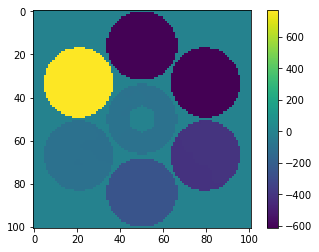

In [6]:
WW = np.zeros(lsq_aco.pupil_mask.shape)
WW[lsq_aco.pupil_mask] = np.sum(np.concatenate(W,axis=1),axis=1)

plt.imshow(WW.reshape(101,101)*1e9)
plt.colorbar()

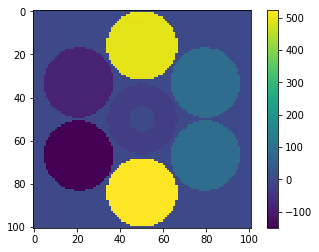

In [8]:
WW = np.zeros(lsq_aco.pupil_mask.shape)
WW[lsq_aco.pupil_mask] = np.sum(np.concatenate(W1,axis=1),axis=1)

plt.imshow(WW.reshape(101,101)*1e9)
plt.colorbar()

In [6]:
WP = list(W)
for X in WP:
    idx = X!=0
    X[idx] = X[idx] - np.mean(X[idx])

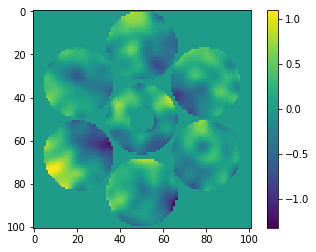

In [7]:
#WP = [X - np.mean(X[X!=0]) for X in W]
WWP = np.zeros(lsq_aco.pupil_mask.shape)
WWP[lsq_aco.pupil_mask] = np.sum(np.concatenate(WP,axis=1),axis=1)

plt.imshow(WWP.reshape(101,101)*1e9,interpolation='none')
plt.colorbar()

In [8]:
101**2

10201

In [5]:
np.diag(lsq_aco.L[0])[:,None].shape

(54, 1)

In [5]:
W[0].shape

(5636, 1)

In [6]:
np.sqrt(sum([np.var(X) for X in W]))*1e9

272.38167980331667

In [3]:
lsq_aco.WFE(10**-6.5,gs_wfs_mag=12,
            spotFWHM_arcsec=seeingArcsec,
            pixelScale_arcsec=wfs.pixel_scale_arcsec,
            nPhBackground=70,controller={'T':30,'tau':1,'g':0.5},
            piston_removed=True)
print lsq_aco.noise_free_wfe, lsq_aco.wfe_rms, lsq_aco.wfe_noise_rms

@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
(5636, 5636)
PISTON REMOVAL!
(5636, 5636)
(5636, 5636)
1.20106706193 405.131505734 438.125591885


In [5]:
lsq_aco.piston_removed = True
lsq_aco.WFE(10**-6.5,gs_wfs_mag=12,
            spotFWHM_arcsec=seeingArcsec,
            pixelScale_arcsec=wfs.pixel_scale_arcsec,
            nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
print lsq_aco.noise_free_wfe, lsq_aco.wfe_rms, lsq_aco.wfe_noise_rms

@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
1.11058269915 405.131505734 405.129983517


In [11]:
%%time
%%capture AcO_WFE_log
mags = np.arange(10,21)
threshold = 10**np.array([-6.5,-5.5,-4.5])
lin_wfe_rms0 = np.zeros(3)
lin_wfe_rms = np.zeros((mags.size,3))
lin_wfe_noise_rms = np.zeros((mags.size,3))
for k in range(3):
    for kMags in range(mags.size):
        lsq_aco.WFE(threshold[k],gs_wfs_mag=mags[kMags],
                    spotFWHM_arcsec=seeingArcsec,
                    pixelScale_arcsec=wfs.pixel_scale_arcsec,
                    nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
        lin_wfe_rms0[k] = lsq_aco.noise_free_wfe
        lin_wfe_rms[kMags,k] = lsq_aco.wfe_rms
        lin_wfe_noise_rms[kMags,k] = lsq_aco.wfe_noise_rms

CPU times: user 4min 14s, sys: 39.1 s, total: 4min 53s
Wall time: 1min 13s


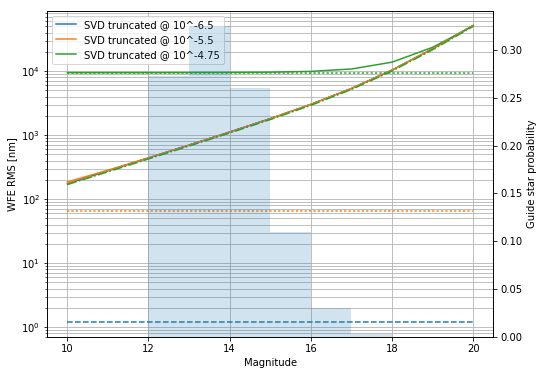

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

tax = ax.twinx()
asts = np.loadtxt('asterisms_agws',delimiter=',')
h_mag = tax.hist(asts[:,2],10,[10,20],alpha=0.2, normed=1)
tax.set_ylabel('Guide star probability')

ax.semilogy(mags,lin_wfe_rms)
h = ax.semilogy(mags,lin_wfe_noise_rms,'-.',label='Noise')
[h[k].set_color('C%d'%k) for k in range(3)]
ax.plot([10,20],[lin_wfe_rms0[0]]*2,'C0--')
ax.plot([10,20],[lin_wfe_rms0[1]]*2,'C1:')
ax.plot([10,20],[lin_wfe_rms0[2]]*2,'C2:')

ax.grid(which='both')
ax.set_xlabel('Magnitude')
ax.set_ylabel('WFE RMS [nm]')

ax.legend(['SVD truncated @ 10^-6.5','SVD truncated @ 10^-5.5','SVD truncated @ 10^-4.75'])

In [65]:
%%time
%%capture AcO_WFE_log
mags = np.arange(10,21)
threshold = 10**np.array([-6.5,-5.5,-4.5])
lin_wfe_rms0 = np.zeros(3)
lin_wfe_rms = np.zeros((mags.size,3))
lin_wfe_noise_rms = np.zeros((mags.size,3))
for k in range(3):
    for kMags in range(mags.size):
        lsq_aco_noTt7.WFE(threshold[k],gs_wfs_mag=mags[kMags],
                    spotFWHM_arcsec=seeingArcsec,
                    pixelScale_arcsec=wfs.pixel_scale_arcsec,
                    nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
        lin_wfe_rms0[k] = lsq_aco_noTt7.noise_free_wfe
        lin_wfe_rms[kMags,k] = lsq_aco_noTt7.wfe_rms
        lin_wfe_noise_rms[kMags,k] = lsq_aco_noTt7.wfe_noise_rms

CPU times: user 6min 13s, sys: 47.4 s, total: 7min 1s
Wall time: 1min 45s


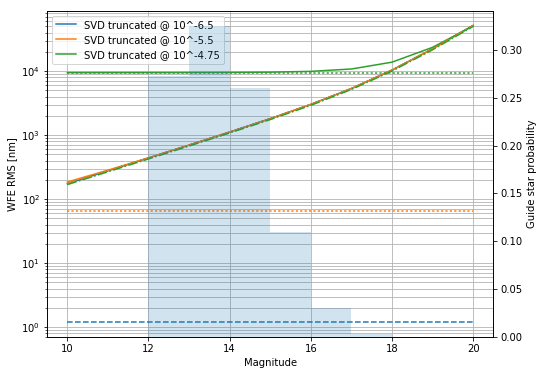

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

tax = ax.twinx()
asts = np.loadtxt('asterisms_agws',delimiter=',')
h_mag = tax.hist(asts[:,2],10,[10,20],alpha=0.2, normed=1)
tax.set_ylabel('Guide star probability')

ax.semilogy(mags,lin_wfe_rms)
h = ax.semilogy(mags,lin_wfe_noise_rms,'-.',label='Noise')
[h[k].set_color('C%d'%k) for k in range(3)]
ax.plot([10,20],[lin_wfe_rms0[0]]*2,'C0--')
ax.plot([10,20],[lin_wfe_rms0[1]]*2,'C1:')
ax.plot([10,20],[lin_wfe_rms0[2]]*2,'C2:')

ax.grid(which='both')
ax.set_xlabel('Magnitude')
ax.set_ylabel('WFE RMS [nm]')

ax.legend(['SVD truncated @ 10^-6.5','SVD truncated @ 10^-5.5','SVD truncated @ 10^-4.75'])

# WFE VERSUS MODE

In [67]:
%%time
%%capture AcO_WFE_log
#lsq_aco.set_N_MODE(42)
zen = np.arange(1,11)*ceo.constants.ARCMIN2RAD
azi = np.arange(21)*2*np.pi/20;
n = (azi.size,zen.size)
noise_free_wfe = np.zeros(n)
wfe_rms        = np.zeros(n)
for ii in range(zen.size):
    for jj in range(azi.size):
        lsq_aco_noTt7.WFE(10**-6.5,gs_wfs_mag=6,
                    spotFWHM_arcsec=seeingArcsec,
                    pixelScale_arcsec=wfs.pixel_scale_arcsec,
                    nPhBackground=70,controller={'T':30,'tau':1,'g':0.5},
                    zenazi=[zen[ii],azi[jj]])
        noise_free_wfe[jj,ii] = lsq_aco_noTt7.noise_free_wfe
        wfe_rms[jj,ii]        = lsq_aco_noTt7.wfe_rms

CPU times: user 47min 46s, sys: 9min 29s, total: 57min 16s
Wall time: 24min 31s


In [74]:
ii = 9
jj = 2
lsq_aco_noTt7.WFE(10**-6.5,gs_wfs_mag=6,
            spotFWHM_arcsec=seeingArcsec,
            pixelScale_arcsec=wfs.pixel_scale_arcsec,
            nPhBackground=70,controller={'T':30,'tau':1,'g':0.5},
            zenazi=[zen[ii],azi[jj]])
print lsq_aco_noTt7.noise_free_wfe, lsq_aco_noTt7.wfe_rms

@(AcO.LSQ)> Generation of observables ...
OPTICAL PATH: ['GMT_MX']
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
206.782819796 209.14923323


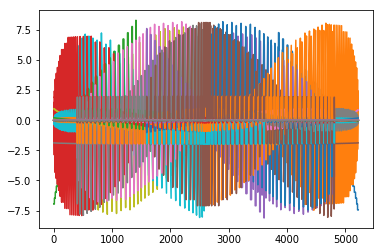

In [76]:
q = [plt.plot(lsq_aco_noTt7.Os[k]) for k in range(7)]

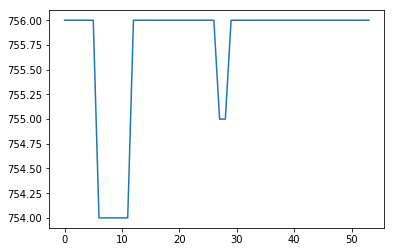

In [83]:
plt.plot(np.sum(lsq_aco_noTt7.Os[0]!=0,axis=0))

In [59]:
plt.plot(lsq_aco.Osp[7]);

IndexError: list index out of range

In [11]:
r,o = np.meshgrid(zen*ceo.constants.RAD2ARCMIN,azi)
x = r*np.cos(o)
y = r*np.sin(o)

In [12]:
azi

array([ 0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265,  3.45575192,  3.76991118,  4.08407045,  4.39822972,
        4.71238898,  5.02654825,  5.34070751,  5.65486678,  5.96902604,
        6.28318531])

In [73]:
wfe_rms

array([[  27.62504427,   27.72076336,   27.87386955,   28.09407087,
          28.38184871,   28.72758706,   29.13787715,   29.58011857,
          30.07845659,   31.39908018],
       [  27.62277419,   75.68254144,  221.21791336,   28.09648069,
          28.38485644,   28.72681447,   29.12573746,   29.58107672,
          30.47051585,   88.04898085],
       [  27.61909808,   27.72321426,   27.88195462,   28.10491059,
          28.38217841,   28.722574  ,   29.12351539,   29.57669731,
          30.46925005,  209.14923323],
       [  27.6196448 ,   27.72319987,   27.88459468,   28.1027152 ,
          28.37859596,   28.71878479,   29.11365201,   29.56775832,
          30.0706413 ,   31.19547605],
       [  27.62091188,   27.71647268,   27.86963163,   28.09601427,
          28.37835473,   28.71304907,   29.10337353,   29.55910455,
          30.06402695,   32.33377491],
       [ 185.30522669,  209.92879766,   27.87084649,   28.08436435,
          28.36258698,   28.70492897,   29.10823272,   29

ValueError: x and y must have same first dimension, but have shapes (21,) and (10,)

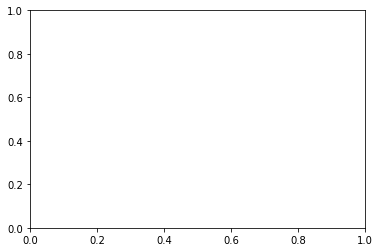

In [14]:
plt.plot(azi*180/np.pi,wfe_rms[-1,:],'.')

In [21]:
data = np.copy(wfe_rms)
data[data>40] = np.nan

/home/ubuntu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


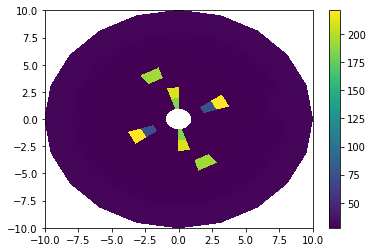

In [69]:
plt.pcolormesh(x,y,wfe_rms)
plt.colorbar()
#plt.clim([0,5])

In [32]:
x,y = np.cos(azi),np.sin(azi)
x *= zen*ceo.constants.RAD2ARCMIN
y *= zen*ceo.constants.RAD2ARCMIN

ValueError: operands could not be broadcast together with shapes (21,) (10,) (21,) 

In [10]:
AcO_WFE_log.show()

@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 0

@(wfsNoise)> Clo

# M1 # MODE

In [6]:
%%capture
mags = np.arange(6,21,2)
threshold = 10**np.array([-5.5])
lin_wfe_rms = {}
modes = [0,7,14,27,42]
for mag in mags:
    sys.stdout.write("___ Magnitude #: %d ___\n"%mag)
    _lin_wfe_rms_ = {}
    for n_mode in modes:
        sys.stdout.write("  ___ Bending modes #: %d ___\n"%n_mode)
        sys.stdout.flush()
        lsq_aco.set_N_MODE(n_mode)

        lsq_aco.WFE(threshold,gs_wfs_mag=mag,
                spotFWHM_arcsec=seeingArcsec,
                pixelScale_arcsec=wfs.pixel_scale_arcsec,
                nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
        _lin_wfe_rms_[n_mode] = {'w/o noise':lsq_aco.noise_free_wfe,
                              'w/ noise':lsq_aco.wfe_rms,
                              'just noise':lsq_aco.wfe_noise_rms}
    lin_wfe_rms[mag] = _lin_wfe_rms_

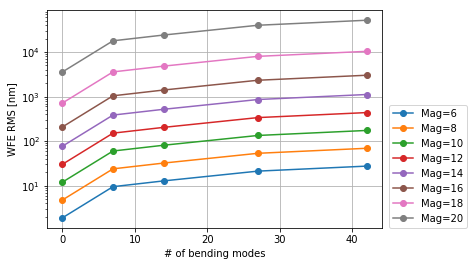

In [17]:
for mag in mags:
    plt.semilogy(modes,[lin_wfe_rms[mag][k]['just noise'] for k in modes],'o-',label='Mag=%d'%mag)
plt.grid()
plt.xlabel('# of bending modes')
plt.ylabel('WFE RMS [nm]')
plt.legend(loc=(1.02,0))

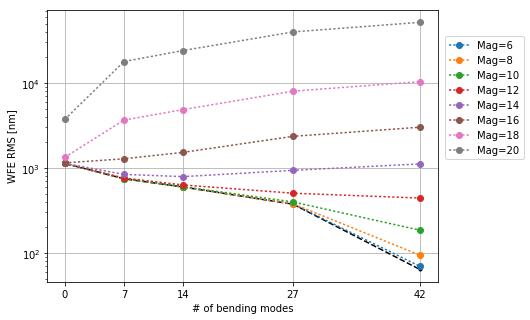

In [8]:
fig = plt.figure(figsize=(7,5))
plt.plot(modes,[lin_wfe_rms[6][k]['w/o noise'] for k in modes],'k.--')
for mag in mags:
    plt.semilogy(modes,[lin_wfe_rms[mag][k]['w/ noise'] for k in modes],'o:',label='Mag=%d'%mag)
#for mag in mags[0]:
plt.grid()
plt.xlabel('# of bending modes')
plt.ylabel('WFE RMS [nm]')
plt.xticks(modes)
plt.legend(loc=(1.02,0.45))

(8, 12000.0)

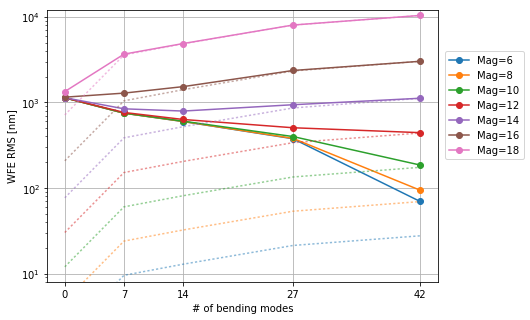

In [32]:
fig = plt.figure(figsize=(7,5))
#plt.plot(modes,[lin_wfe_rms[6][k]['w/o noise'] for k in modes],'k.--')
#for mag in mags[-1]:
#    plt.semilogy(modes,[lin_wfe_rms[mag][k]['just noise'] for k in modes],'o:',label='Mag=%d'%mag)
c=0
for mag in mags[:-1]:
    plt.semilogy(modes,[lin_wfe_rms[mag][k]['just noise'] for k in modes],'C%d:'%c,alpha=0.5)
    plt.semilogy(modes,[lin_wfe_rms[mag][k]['w/ noise'] for k in modes],'C%do-'%c,label='Mag=%d'%mag)
    c+=1
#for mag in mags[0]:
plt.grid()
plt.xlabel('# of bending modes')
plt.ylabel('WFE RMS [nm]')
plt.xticks(modes)
plt.legend(loc=(1.02,0.45))
plt.ylim([8,1.2*10**4])

In [12]:
[lin_wfe_rms[mag][k]['w/o noise'] for k in modes]

[1130.3690848570182,
 746.9059287989719,
 596.82325872343665,
 375.05366458510741,
 64.019213128648957]

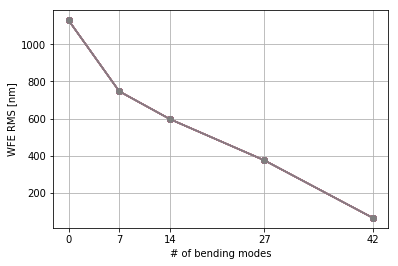

In [10]:
for mag in mags:
    plt.plot(modes,[lin_wfe_rms[mag][k]['w/o noise'] for k in modes],'o-')
plt.grid()
plt.xlabel('# of bending modes')
plt.xticks(modes)
plt.ylabel('WFE RMS [nm]')

In [93]:
%%capture --no-stderr
mags = np.arange(6,21,2)
lin_wfe_rms = {}
for threshold in [-6.5,-5.5,-4.5]:
    sys.stderr.write('\nthreshold %g:'%threshold)
    _lin_wfe_rms_ = {}
    modes = [0,7,14,27,42]
    for mag in mags:
        sys.stderr.write("\n . m=%d: n="%mag)
        __lin_wfe_rms__ = {}
        for n_mode in modes:
            sys.stderr.write("%d "%n_mode)
            sys.stderr.flush()
            lsq_aco_noTt7.set_N_MODE(n_mode)

            lsq_aco_noTt7.WFE(10**threshold,gs_wfs_mag=mag,
                    spotFWHM_arcsec=seeingArcsec,
                    pixelScale_arcsec=wfs.pixel_scale_arcsec,
                    nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})
            __lin_wfe_rms__[n_mode] = {'w/o noise':lsq_aco_noTt7.noise_free_wfe,
                                  'w/ noise':lsq_aco_noTt7.wfe_rms,
                                  'just noise':lsq_aco_noTt7.wfe_noise_rms}
        _lin_wfe_rms_[mag] = __lin_wfe_rms__
    lin_wfe_rms[threshold] = _lin_wfe_rms_


threshold -6.5:
 . m=6: n=0 7 14 27 42 
 . m=8: n=0 7 14 27 42 
 . m=10: n=0 7 14 27 42 
 . m=12: n=0 7 14 27 42 
 . m=14: n=0 7 14 27 42 
 . m=16: n=0 7 14 27 42 
 . m=18: n=0 7 14 27 42 
 . m=20: n=0 7 14 27 42 
threshold -5.5:
 . m=6: n=0 7 14 27 42 
 . m=8: n=0 7 14 27 42 
 . m=10: n=0 7 14 27 42 
 . m=12: n=0 7 14 27 42 
 . m=14: n=0 7 14 27 42 
 . m=16: n=0 7 14 27 42 
 . m=18: n=0 7 14 27 42 
 . m=20: n=0 7 14 27 42 
threshold -4.5:
 . m=6: n=0 7 14 27 42 
 . m=8: n=0 7 14 27 42 
 . m=10: n=0 7 14 27 42 
 . m=12: n=0 7 14 27 42 
 . m=14: n=0 7 14 27 42 
 . m=16: n=0 7 14 27 42 
 . m=18: n=0 7 14 27 42 
 . m=20: n=0 7 14 27 42 

In [97]:
lin_wfe_rms[threshold][mag][0]['w/o noise']

1056.1582119758564

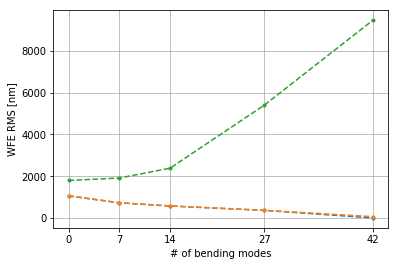

In [101]:
for threshold in [-6.5,-5.5,-4.5]:
    plt.plot(modes,[lin_wfe_rms[threshold][6][k]['w/o noise'] for k in modes],'.--')
plt.grid()
plt.xlabel('# of bending modes')
plt.xticks(modes)
plt.ylabel('WFE RMS [nm]')

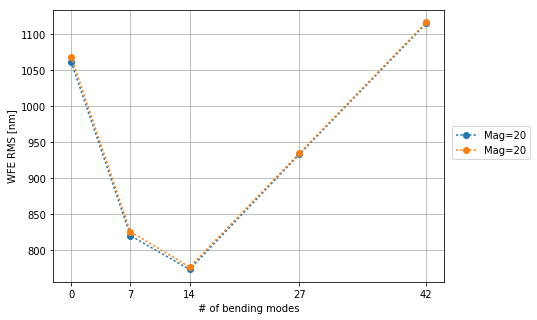

In [116]:
fig = plt.figure(figsize=(7,5))
#plt.plot(modes,[lin_wfe_rms[6][k]['w/o noise'] for k in modes],'k.--')
for threshold in [-6.5,-5.5]:
    plt.plot(modes,[lin_wfe_rms[threshold][14][k]['w/ noise'] for k in modes],'o:',label='Mag=%d'%mag)
#for mag in mags[0]:
plt.grid()
plt.xlabel('# of bending modes')
plt.ylabel('WFE RMS [nm]')
plt.xticks(modes)
plt.legend(loc=(1.02,0.45))

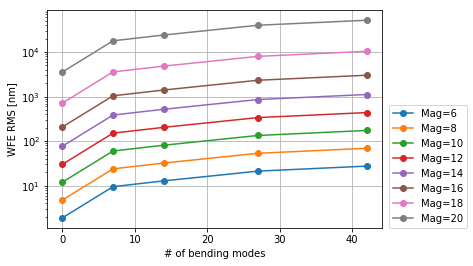

In [90]:
for mag in mags:
    plt.semilogy(modes,[lin_wfe_rms[mag][k]['just noise'] for k in modes],'o-',label='Mag=%d'%mag)
plt.grid()
plt.xlabel('# of bending modes')
plt.ylabel('WFE RMS [nm]')
plt.legend(loc=(1.02,0))

In [28]:
np.sqrt(np.diag(lsq_aco.L[0])[12:])*1e6

array([ 3.14204996,  3.12399321,  3.13831014,  2.09272039,  2.10130412,
        2.10195378,  2.07299559,  1.56225744,  1.59339537,  1.56893023,
        1.56231658,  1.56688853,  1.27672973,  1.25925662,  1.26683164,
        1.26641776,  1.2507632 ,  1.25446509,  1.05052994,  1.03929003,
        1.04520565,  1.07069143,  1.03985765,  1.05056322,  1.04627849,
        0.89317271,  0.8974121 ,  0.91580445,  0.90198486,  0.89929968,
        0.89267046,  0.89266946,  0.91606856,  0.78555428,  0.78246087,
        0.7810352 ,  0.78869522,  0.78352511,  0.78601447,  0.78743471,
        0.78968098,  0.78151143])

In [29]:
np.sqrt(np.sum(np.diag(lsq_aco.L[0])[12:]))*1e6

9.4147597497863895

In [30]:
lsq_aco.Os[0].shape

(5636, 54)

In [ ]:
lsq_aco.Os_orig[0]

In [61]:
radialOrders = np.concatenate( [np.ones((1,x+1))*x for x in range(9)] , axis=1 )
scale = 1.0/radialOrders[0,3:]
M1_avar = (1e-6*scale/scale[0])**2
np.sqrt(M1_avar.sum())

2.9968511441253383e-06

In [42]:
O = lsq_aco.Os_orig[0][:,12:]
L = lsq_aco.L[0][12:,12:]

In [57]:
np.sqrt(np.trace(L))

9.4147597497863901e-06

In [70]:
N = [X[:,12:].dot(X[:,12:].T) for X in lsq_aco.Os_orig]
np.diag(N[0])

array([ 0.        ,  0.        ,  0.        , ...,  0.00934118,
        0.01078025,  0.01180114])

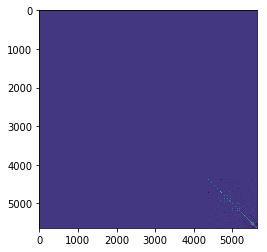

In [71]:
plt.imshow(N[0])

In [51]:
G = [np.trace(X[:,12:].dot(Y[12:,12:].dot(X[:,12:].T))) for X,Y in zip(lsq_aco.Os_orig,lsq_aco.L)]
sum(G)

6.2867817460317492e-11

In [55]:
np.sqrt(sum(G)/lsq_aco.Os_orig[0].shape[0])*1e6

0.10561575294988243

In [40]:
lsq_aco.set_N_MODE(0)

lsq_aco.WFE(threshold,gs_wfs_mag=mag,
        spotFWHM_arcsec=seeingArcsec,
        pixelScale_arcsec=wfs.pixel_scale_arcsec,
        nPhBackground=70,controller={'T':30,'tau':1,'g':0.5})


@(AcO.LSQ)> Setting initial aberrations ...
 >> Initial WFE RMS: 440.02micron
 >> Initial WFE RMS after TT7 correction: 439.34micron
@(CalibrationMatrix)> Updating the pseudo-inverse...
Fitting variance: 1.25714e-14

@(wfsNoise)> Closed-loop noise rejection factor: 0.2972


In [41]:
np.sqrt(1.25714e-14)*1e6

0.11212225470440737